Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Importing the dataset

In [2]:
data=pd.read_csv('./datasets/Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


splitting into x and y only

In [3]:
x=data.iloc[:,1:-1].values   #postions nhi chahiye
y=data.iloc[:,-1].values
x

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]], dtype=int64)

In [4]:
y=y.reshape(len(y),1)
y  #y ko 2d array mai convert kar diya useful in standardisation

array([[  45000],
       [  50000],
       [  60000],
       [  80000],
       [ 110000],
       [ 150000],
       [ 200000],
       [ 300000],
       [ 500000],
       [1000000]], dtype=int64)

Feature Scaling :- Standardisation

In [5]:
from sklearn.preprocessing import StandardScaler
scaler_x=StandardScaler()
x=scaler_x.fit_transform(x)
x

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

For standardisation of y

In [6]:
scaler_y=StandardScaler()
y=scaler_y.fit_transform(y)
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


Training the model

In [7]:
from sklearn.svm import SVR
regressor=SVR(kernel='rbf')
regressor.fit(x,y)

c:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Let's do prediction for that we have to inverse also 
Let's take the input as 9

.reshape(-1,1): This reshapes the predicted value into a column vector (if it's not already in that shape). The -1 argument means that the number of rows is inferred based on the total size of the array and the provided number of columns (1 in this case).

In [8]:
prediction=scaler_y.inverse_transform(regressor.predict(scaler_x.transform([[9]])).reshape(-1,1))

In [10]:
prediction  #close to 500000

array([[471671.95587315]])

Visualisation

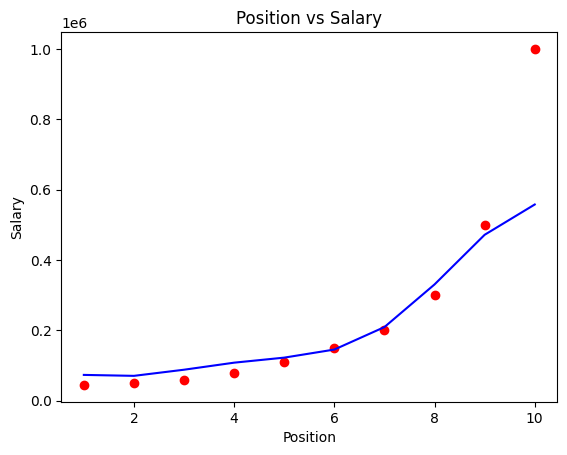

In [12]:
plt.scatter(scaler_x.inverse_transform(x),scaler_y.inverse_transform(y),color='red')   #original
plt.plot(scaler_x.inverse_transform(x),scaler_y.inverse_transform(regressor.predict(x).reshape(-1,1)),color='blue')   #regression line
plt.title('Position vs Salary')
plt.xlabel('Position')
plt.ylabel('Salary')
plt.show()

In [13]:
#nice graph